In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace = True)

In [5]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
df.shape

(200000, 7)

In [7]:
#problem statemet>> To predict Fare
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [8]:
df.sample(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
169556,14.5,2013-12-22 15:10:21 UTC,-73.992954,40.752720,-73.980063,40.760114,2
81543,16.5,2009-08-20 13:27:09 UTC,-73.979986,40.749258,-74.014020,40.715417,1


In [9]:
df.passenger_count.value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64

In [10]:
df = df[~(df.passenger_count == 0) & ~(df.passenger_count == 208)]

In [11]:
df.shape

(199290, 7)

In [12]:
#there can be other columns as well where the values should be validated
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [13]:
#longitude >> -180-180
#latitude> -90-90

In [14]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

In [15]:
df.shape

(199278, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199278 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199278 non-null  float64
 1   pickup_datetime    199278 non-null  object 
 2   pickup_longitude   199278 non-null  float64
 3   pickup_latitude    199278 non-null  float64
 4   dropoff_longitude  199278 non-null  float64
 5   dropoff_latitude   199278 non-null  float64
 6   passenger_count    199278 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [18]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

In [19]:
df.drop('pickup_datetime', axis=1, inplace=True)

In [20]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17
...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199278 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199278 non-null  float64
 1   pickup_longitude   199278 non-null  float64
 2   pickup_latitude    199278 non-null  float64
 3   dropoff_longitude  199278 non-null  float64
 4   dropoff_latitude   199278 non-null  float64
 5   passenger_count    199278 non-null  int64  
 6   year               199278 non-null  int32  
 7   month              199278 non-null  int32  
 8   day                199278 non-null  int32  
 9   hour               199278 non-null  int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 13.7 MB


In [22]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
hour                 0
dtype: int64

In [23]:
df.duplicated().sum()

3

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
#feature engineering
df['monthly_quarter'] = df.month.map({1: 'Q1', 2:'Q1', 3:'Q1', 4: 'Q2', 5:'Q2', 6:'Q2', 7: 'Q3', 8:'Q3', 9:'Q3', 10: 'Q4', 11:'Q4', 12:'Q4'})

In [26]:
df["hourly_segment"] = df.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

In [27]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,monthly_quarter,hourly_segment
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,Q2,H5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,Q3,H6
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,Q3,H6
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,Q2,H3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,Q3,H5
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,28,10,Q4,H3
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1,Q1,H1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0,Q2,H1
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14,Q2,H4


In [28]:
# !pip install geopy

In [29]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'monthly_quarter', 'hourly_segment'],
      dtype='object')

In [30]:
# df = df.sample(10)
# df

In [31]:
from geopy.distance import geodesic #pickup-dropoff will give distance
df['distance'] = [round(geodesic((df.pickup_latitude[i],df.pickup_longitude[i]), (df.dropoff_latitude[i], df.dropoff_longitude[i])).km, 2) for i in df.index]

In [32]:
df.drop(['hour', 'month'], axis = 1, inplace = True)

In [33]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,monthly_quarter,hourly_segment,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,Q2,H5,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,Q3,H6,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,Q3,H6,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,Q2,H3,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,Q3,H5,4.48
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,Q4,H3,0.11
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,Q1,H1,1.88
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,29,Q2,H1,12.87
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,20,Q2,H4,3.54


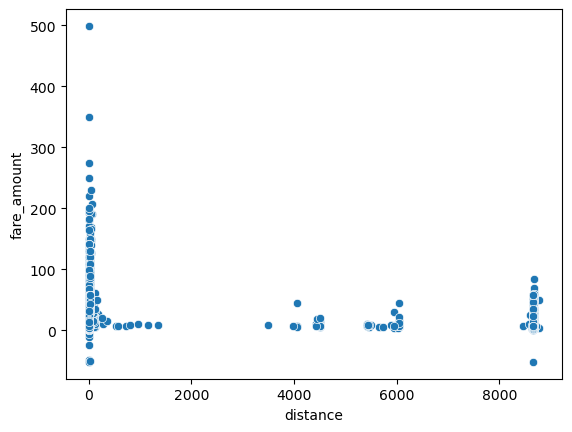

In [34]:
sns.scatterplot(data=df, x="distance", y="fare_amount")
plt.show()

In [35]:
df = df[(df.fare_amount < 250) & (df.fare_amount >0)]

In [36]:
df = df[df.distance < 1000]

In [37]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,monthly_quarter,hourly_segment,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,Q2,H5,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,Q3,H6,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,Q3,H6,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,Q2,H3,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,Q3,H5,4.48
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,Q4,H3,0.11
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,Q1,H1,1.88
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,29,Q2,H1,12.87
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,20,Q2,H4,3.54


In [38]:
#outlier
df1 = df.copy()
features1 = ['distance' , 'fare_amount']

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,monthly_quarter,hourly_segment,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,Q2,H5,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,Q3,H6,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,Q3,H6,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,Q2,H3,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,Q3,H5,4.48


In [39]:
df = df1.copy()

In [40]:
#data exploration

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176072 entries, 0 to 176071
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        176072 non-null  float64
 1   pickup_longitude   176072 non-null  float64
 2   pickup_latitude    176072 non-null  float64
 3   dropoff_longitude  176072 non-null  float64
 4   dropoff_latitude   176072 non-null  float64
 5   passenger_count    176072 non-null  int64  
 6   year               176072 non-null  int32  
 7   day                176072 non-null  int32  
 8   monthly_quarter    176072 non-null  object 
 9   hourly_segment     176072 non-null  object 
 10  distance           176072 non-null  float64
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 13.4+ MB


In [42]:
df_dummy = pd.get_dummies(df[['monthly_quarter', 'hourly_segment']], drop_first=True)

In [43]:
df = pd.concat([df, df_dummy], axis = 1)

In [44]:
df.drop(['monthly_quarter',	'hourly_segment'], axis=1, inplace = True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176072 entries, 0 to 176071
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         176072 non-null  float64
 1   pickup_longitude    176072 non-null  float64
 2   pickup_latitude     176072 non-null  float64
 3   dropoff_longitude   176072 non-null  float64
 4   dropoff_latitude    176072 non-null  float64
 5   passenger_count     176072 non-null  int64  
 6   year                176072 non-null  int32  
 7   day                 176072 non-null  int32  
 8   distance            176072 non-null  float64
 9   monthly_quarter_Q2  176072 non-null  bool   
 10  monthly_quarter_Q3  176072 non-null  bool   
 11  monthly_quarter_Q4  176072 non-null  bool   
 12  hourly_segment_H2   176072 non-null  bool   
 13  hourly_segment_H3   176072 non-null  bool   
 14  hourly_segment_H4   176072 non-null  bool   
 15  hourly_segment_H5   176072 non-nul

In [46]:

#split the data into X, y
X = df.drop('fare_amount', axis =1)
y = df['fare_amount']

In [47]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,distance,monthly_quarter_Q2,monthly_quarter_Q3,monthly_quarter_Q4,hourly_segment_H2,hourly_segment_H3,hourly_segment_H4,hourly_segment_H5,hourly_segment_H6
0,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,1.68,True,False,False,False,False,False,True,False
1,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,2.45,False,True,False,False,False,False,False,True
2,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,5.04,False,True,False,False,False,False,False,True
3,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,1.66,True,False,False,False,True,False,False,False
4,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,4.48,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176067,-73.983070,40.760770,-73.972972,40.754177,1,2014,31,1.12,False,False,False,False,False,True,False,False
176068,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,0.11,False,False,True,False,True,False,False,False
176069,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,1.88,False,False,False,False,False,False,False,False
176070,-73.997124,40.725452,-73.983215,40.695415,1,2015,20,3.54,True,False,False,False,False,True,False,False


In [48]:
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
176067    12.0
176068     3.0
176069     7.5
176070    14.5
176071    14.1
Name: fare_amount, Length: 176072, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [50]:
X_train.shape, X_test.shape

((123250, 16), (52822, 16))

In [51]:
#scaling(optional)

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.coef_

array([-2.64211817e+00,  8.33865740e+00,  2.76223997e+00, -8.23275358e+00,
        2.87490436e-02,  3.37897715e-01,  9.87411629e-04,  1.94023119e+00,
        1.56499985e-01,  2.05180937e-01,  4.73283889e-01, -2.53736539e-01,
        7.72623478e-01,  8.82573567e-01,  6.68206690e-01,  2.10308065e-01])

In [55]:
model.intercept_

-671.8814551971785

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred

array([8.23668542, 8.25462198, 6.93447716, ..., 7.04437846, 6.59444725,
       6.07692822])

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred) 

0.6727182324201683

In [59]:
mean_squared_error(y_test, y_pred)

4.494212021614221

In [60]:
#1 perecnt r2_score>> 60%r2_score
#EDA, feature engineering, outlier treatment